# Lista 10 - sieci przepływowe #


In [1]:
import networkx as nx
import matplotlib.pyplot as plt


### <b> Zadanie nr 1 </b> ###
Zaimplementuj algorytm Edmondsa-Karpa dla sieci przepływowej zadanej w pliku. Zaproponuj format danych w pliku. Wyświetl sieci rezydualne w każdym kroku algorytmu.

Zadbaj o to, żeby sieć była wyświetlana przejrzyście - z wyraźnie zaznaczonymi kierunkami przepływu, bez
losowości w pozycjach wierzchołków itd.

{0: [], 1: [(0, 1)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)], 4: [(0, 2), (2, 4)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)], 4: [(0, 2), (2, 4)], 5: [(0, 1), (1, 3), (3, 5)]}
{0: [], 1: [(0, 1)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)], 4: [(0, 2), (2, 4)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)], 4: [(0, 2), (2, 4)], 5: [(0, 2), (2, 4), (4, 5)]}
{0: [], 1: [(0, 1)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)], 4: [(0, 1), (1, 3), (3, 4)]}
{0: [], 1: [(0, 1)], 2: [(0, 2)], 3: [(0, 1), (1, 3)], 4: [(0, 1), (1, 3), (3, 4)], 5: [(0, 1), (1, 3), (3, 4), (4, 5)]}
{0: [], 2: [(0, 2)]}
Algorytm Edmondsa-Karpa
Maksymalny przpływ:  5


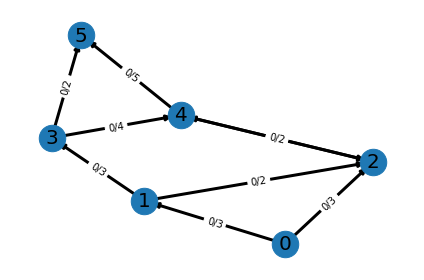

In [47]:
import json
import networkx as nx
import matplotlib.pyplot as plt

#Edmonds-Karp Algorithm
def max_flow(C, s, t):
        n = len(C) # C is the capacity matrix
        F = [[0] * n for i in range(n)]
        path = bfs(C, F, s, t)
      #  print path
        while path != None:
            flow = min(C[u][v] - F[u][v] for u,v in path)
            for u,v in path:
                F[u][v] += flow
                F[v][u] -= flow
            path = bfs(C, F, s, t)
        return sum(F[s][i] for i in range(n))

#find path by using BFS
def bfs(C, F, s, t):
        queue = [s]
        paths = {s:[]}
        if s == t:
            return paths[s]
        while queue: 
            u = queue.pop(0)
            for v in range(len(C)):
                    if(C[u][v]-F[u][v]>0) and v not in paths:
                        paths[v] = paths[u]+[(u,v)]
                        print(paths)
                        if v == t:
                            return paths[v]
                        queue.append(v)
        return None
    
def CtoNE(C):
    """capacity matrix to Edges and Nodes"""
    N = []
    e = []
    E = [] #(u,v,weight)
    # 97 - a
    N = [i for i in range(len(C))]
    for i in range(len(C)):
        for j in range(len(C)):
            if C[i][j] != 0:
                E.append((N[i], N[j], '0/'+str(C[i][j]))) 
                e.append((N[i], N[j], C[i][j])) 
    return e, E    

def plot(C):
    e, E = CtoNE(C)
    G = nx.DiGraph()
    G.add_weighted_edges_from(e)
    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
    G = nx.DiGraph()
    G.add_weighted_edges_from(E)

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, width=3)

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def ford_fulkerson(C, source, sink):
        parent = [-1] * (len(C))
        max_flow = 0

        while bfs(C, source, sink, parent):

            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, C[parent[s]][s])
                s = parent[s]

            # Adding the path flows
            max_flow += path_flow

            # Updating the residual values of edges
            v = sink
            while(v != source):
                u = parent[v]
                C[u][v] -= path_flow
                C[v][u] += path_flow
                v = parent[v]

        return max_flow

with open('graph.json', 'r') as f:
    C = json.load(f)
C = C['C']




source = 0  # a
sink = 5    # f
max_flow_value = max_flow(C, source, sink)
print("Algorytm Edmondsa-Karpa")
print("Maksymalny przpływ: ",max_flow_value)


plot(C)

### <b>Zadanie nr 2</b> ###

Zaimplementuj algorytm Forda-Fulkersona dla sieci przepływowej jak w poprzednim zadaniu. Umożliw podawanie ścieżek powiększającyh przepływ (podaje użytkownik – w każdym kroku algorytmu).

Zadbaj o to, żeby sieć była wyświetlana przejrzyście - z wyraźnie zaznaczonymi kierunkami przepływu, bez losowości w pozycjach wierzchołków itd.

In [49]:
edges = [
    (0, 1, 3),
    (1, 2, 4),
    (1, 3, 3),
    (0, 2, 5),
    (2, 3, 7),
    (3, 4, 6),
    (3, 5, 5),
    (4, 6, 4),
    (5, 6, 7),
    (6, 7, 8),
    (5, 7, 5),
]

In [50]:
size = 100
nodes = list(G.nodes())

pos = {}
x = 1
y = 1
pos[nodes[0]] = [x, y]

for node in nodes[1:-1]:
    if int(node) % 2:
        x += .1
    pos[node] = [x, y + (-1) ** int(node) * .1]

pos[nodes[-1]] = [ pos[nodes[-2]][0] + .1, pos[nodes[0]][-1] ]

In [51]:
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

In [52]:
def plot_net(flows):
    cmap = []
    labels = {}

    for edge in flows:
        f = flows[edge]['flow']
        w = flows[edge]['weight']
        labels[edge] = str(f) + '/' + str(w)
        if w == f:
            cmap.append('red')
        elif f:
            cmap.append('green')
        else:
            cmap.append('black')
    plt.figure(dpi=120)
    nx.draw(
        G,
        pos=pos,
        with_labels=True
        )

    nx.draw_networkx_edge_labels(
        G,
        pos=pos,
        edge_labels=labels,
        )

    nx.draw_networkx_edges(
        G,
        pos=pos,
        edge_color=cmap
    )
    plt.show()

In [53]:
def get_path_from_user():
    path = input('Podaj ścieżkę:')
    if path == 'q':
        return path
    path.replace(' ', '')   
    path = [int(n) for n in path.split(',')]

    return path

In [54]:
def check_adj_flows(flws, s, t):
    f = 0  # flow
    c = 0  # capacity

    # sprawdzenie czy może coś wypłynąć z wierzchołka początkowego
    for edge in flws:
        if edge[0] == s:
            f += flws[edge]['flow']
            c += flws[edge]['weight']
    
    if f == c:
        return f

    f, c = 0,  0

    # sprawdzenie czy może coś wpłynąć do wierzchołka końcowego
    for edge in flws:
        if edge[1] == s:
            f += flws[edge]['flow']
            c += flws[edge]['weight']

    if f == c:
        return f
    else: 
        return


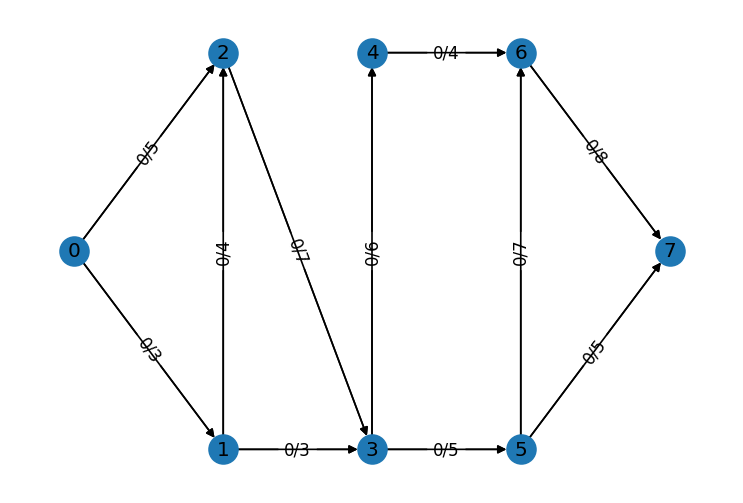

Maksymalny przepływ: None


In [55]:
def ffa(g, s, t):
    """
    Algorytm forda-focusa
    :param g: graf
    :param s: 'kran' (węzeł początkowy)
    :param t: 'zlew' (węzeł końcowy) 
    :return :
    """
    flows = {}

    flows = {}
    for edge in (g.edges()):
        flows[edge] = {
            'flow' : 0,
            'weight': G[edge[0]][edge[1]]['weight']
            }

    plot_net(flows)
    path = get_path_from_user()

    while path != 'q':
        path_edges = []
        weights = []
        for n in range(1, len(path)):
            temp_edge = (path[n-1], path[n])
            path_edges.append(temp_edge)
            weights.append(flows[temp_edge]['weight'] - flows[temp_edge]['flow'])
        for edge in path_edges:
            flows[edge]['flow'] += min(weights)

        plot_net(flows)

        max_flow = check_adj_flows(flows, s, t)

        if max_flow:
            return max_flow
        

        path = get_path_from_user()

        if path[0] != s or path[-1] != t:
            return 'wrong input'

            
print('Maksymalny przepływ:', ffa(G, 0, 7))